<a href="https://colab.research.google.com/github/hiteshisawariya485/DeepLearning/blob/main/practical_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Fetching Data from yahoo finance

In [ ]:
START = "2012-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TATAMOTORS.NS')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,2012-01-02,175.647980,176.698326,170.730405,172.783369,10175802
1,2012-01-03,185.196655,186.008287,177.796429,177.844172,15868503
2,2012-01-04,192.119446,193.360764,184.289517,185.101163,22752471
3,2012-01-05,192.978806,196.464075,191.164556,191.880716,21640778
4,2012-01-06,194.411118,195.747937,189.541286,190.973591,13553191


In [ ]:
df = df.drop(['Date','Open','High','Low', 'Volume'], axis = 1)

<ipython-input-4-b762d74b983a>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date','Open','High','Low', 'Volume'], axis = 1)


In [ ]:
df.head()

Price,Close
Ticker,TATAMOTORS.NS
0,175.647980
1,185.196655
2,192.119446
3,192.978806
4,194.411118


# Plotting Closing Price

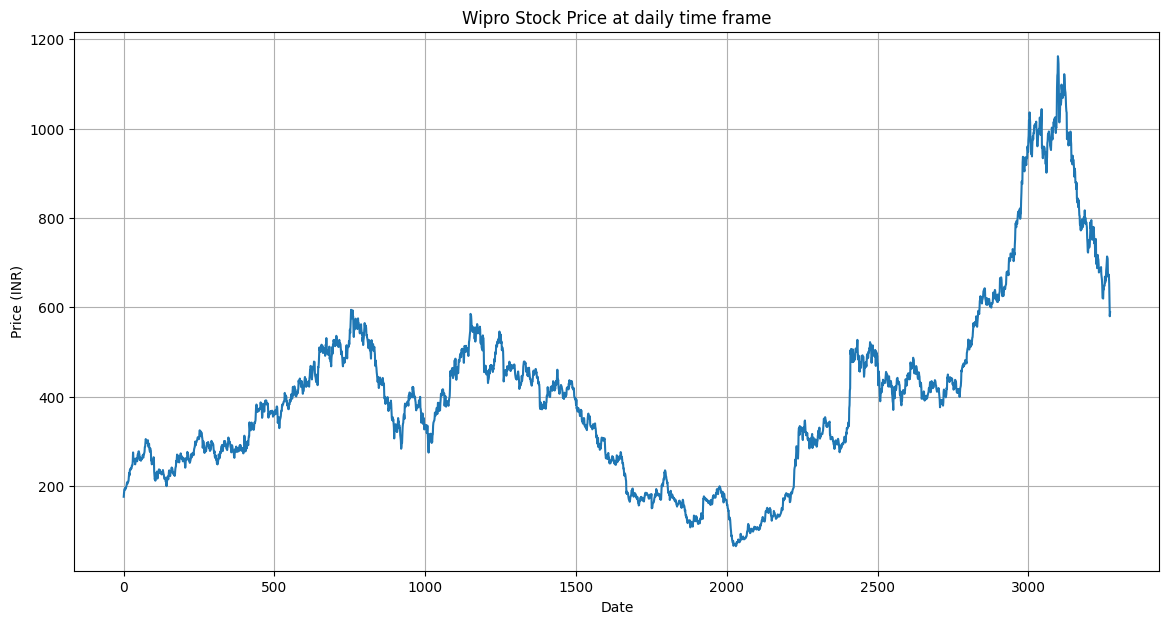

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title("Wipro Stock Price at daily time frame")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close
Ticker,TATAMOTORS.NS
0,175.647980
1,185.196655
2,192.119446
3,192.978806
4,194.411118
...,...
3267,671.900024
3268,653.950012
3269,613.849976


In [ ]:
df.shape

(3272, 1)

# Dataset Spliting for training (70%) and testing (30%)

In [ ]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,2012-01-02,175.647980,176.698326,170.730405,172.783369,10175802
1,2012-01-03,185.196655,186.008287,177.796429,177.844172,15868503
2,2012-01-04,192.119446,193.360764,184.289517,185.101163,22752471
3,2012-01-05,192.978806,196.464075,191.164556,191.880716,21640778
4,2012-01-06,194.411118,195.747937,189.541286,190.973591,13553191
...,...,...,...,...,...,...
3267,2025-04-02,671.900024,675.349976,662.099976,674.950012,8025225
3268,2025-04-03,653.950012,669.000000,652.500000,660.000000,13473832
3269,2025-04-04,613.849976,650.000000,610.000000,650.000000,26621179


In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])
print(data.shape)
print(train.shape)
print(test.shape)

(3272, 6)
(2290, 6)
(982, 6)


In [ ]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,2012-01-02,175.647980,176.698326,170.730405,172.783369,10175802
1,2012-01-03,185.196655,186.008287,177.796429,177.844172,15868503
2,2012-01-04,192.119446,193.360764,184.289517,185.101163,22752471
3,2012-01-05,192.978806,196.464075,191.164556,191.880716,21640778
4,2012-01-06,194.411118,195.747937,189.541286,190.973591,13553191


In [ ]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
2290,2021-04-22,292.731476,300.632406,290.396009,292.184884,61022978
2291,2021-04-23,292.184875,298.147832,288.706484,289.203397,58158986
2292,2021-04-26,293.576233,297.154013,292.781184,295.166361,30583139
2293,2021-04-27,299.638580,300.632406,293.278099,293.874401,35040532
2294,2021-04-28,304.011383,307.589163,301.129294,301.626207,44668126


# Dataset normalization by using MinMax scaler
---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
test

Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
2290,2021-04-22,292.731476,300.632406,290.396009,292.184884,61022978
2291,2021-04-23,292.184875,298.147832,288.706484,289.203397,58158986
2292,2021-04-26,293.576233,297.154013,292.781184,295.166361,30583139
2293,2021-04-27,299.638580,300.632406,293.278099,293.874401,35040532
2294,2021-04-28,304.011383,307.589163,301.129294,301.626207,44668126
...,...,...,...,...,...,...
3267,2025-04-02,671.900024,675.349976,662.099976,674.950012,8025225
3268,2025-04-03,653.950012,669.000000,652.500000,660.000000,13473832
3269,2025-04-04,613.849976,650.000000,610.000000,650.000000,26621179


In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.20124266],
       [0.21078818],
       [0.22447609],
       ...,
       [0.44145011],
       [0.42832846],
       [0.45213487]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2190, 100, 1)

#  LSTM Model

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

# First LSTM layer with more units and higher dropout rate
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))  # Higher dropout for better regularization

# Second LSTM layer with more units and higher dropout rate
model.add(LSTM(units=150, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))  # Slightly higher dropout rate

# Third LSTM layer with more units and dropout
model.add(LSTM(units=200, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Dropout increased further to prevent overfitting

# Fourth LSTM layer with more units
model.add(LSTM(units=250, activation='tanh'))
model.add(Dropout(0.5))  # Same dropout rate for the last layer

# Output layer
model.add(Dense(units=1))  # Prediction of stock price (regression problem)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 100, 150)            │         150,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 100, 200)            │         280,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 100, 200)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 250)                 │         451,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 923,451 (3.52 MB)

 Trainable params: 923,451 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

#  Model Training

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs =5)

Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 291ms/step - loss: 0.0688 - mean_absolute_error: 0.1902
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 40s 313ms/step - loss: 0.0058 - mean_absolute_error: 0.0585
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 38s 273ms/step - loss: 0.0055 - mean_absolute_error: 0.0559
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 288ms/step - loss: 0.0045 - mean_absolute_error: 0.0510
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 288ms/step - loss: 0.0046 - mean_absolute_error: 0.0510


In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(982, 1)

In [ ]:
past_80_days = pd.DataFrame(train_close[-80:])

In [ ]:
test_df = pd.DataFrame(test_close)

# Defining the final test dataset by including the last 100 rows of the training dataset to predict the first column of the testing dataset.

---


In [ ]:
# final_df = past_80_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_80_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,163.534101
1,163.981299
2,170.938098
3,178.739624
4,186.739921


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00000000e+00],
       [4.45653056e-04],
       [7.37842439e-03],
       ...,
       [4.84785681e-01],
       [3.95594807e-01],
       [4.26188784e-01]])

In [ ]:
input_data.shape

(1062, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(80, input_data.shape[0]):
   x_test.append(input_data[i-80: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 80, 1)
(982,)


# Prediction of Closing Price and plotting the Graph

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


In [ ]:
y_pred.shape

(982, 1)

In [ ]:
y_test

array([0.12820643, 0.12523524, 0.13117761, 0.12989011, 0.13761515,
       0.14296326, 0.13236608, 0.12355158, 0.13053387, 0.12771123,
       0.12573046, 0.13711997, 0.13860556, 0.14360705, 0.15222349,
       0.16321684, 0.14940085, 0.1598495 , 0.14702391, 0.1499951 ,
       0.14603351, 0.14875709, 0.14954939, 0.15009414, 0.15103497,
       0.15658119, 0.15266916, 0.15316434, 0.14994557, 0.15920573,
       0.15905719, 0.17351692, 0.17995447, 0.18980891, 0.17891458,
       0.17970688, 0.18371799, 0.1893632 , 0.18376749, 0.18208383,
       0.17936025, 0.16475194, 0.1708924 , 0.17475492, 0.16881255,
       0.16970391, 0.17455681, 0.17638908, 0.17574532, 0.17525011,
       0.17901361, 0.18074679, 0.18168767, 0.14999509, 0.14880658,
       0.13989304, 0.14484502, 0.14405272, 0.14405275, 0.1445479 ,
       0.14514215, 0.14301283, 0.14108153, 0.13959594, 0.134644  ,
       0.12919682, 0.12721603, 0.12424485, 0.12181839, 0.12820642,
       0.13330696, 0.13266321, 0.13885314, 0.12969202, 0.13419

In [ ]:
y_pred

array([[0.14076081],
       [0.14075965],
       [0.1404984 ],
       [0.13999233],
       [0.13928774],
       [0.13852206],
       [0.13789   ],
       [0.13744679],
       [0.13709223],
       [0.13676342],
       [0.13640137],
       [0.13595083],
       [0.13549113],
       [0.13514575],
       [0.13506557],
       [0.13544042],
       [0.13648945],
       [0.13820799],
       [0.1405545 ],
       [0.14330982],
       [0.14623271],
       [0.14906389],
       [0.15161705],
       [0.15378541],
       [0.15553024],
       [0.15686807],
       [0.15789655],
       [0.15868941],
       [0.15930444],
       [0.15975207],
       [0.16011706],
       [0.16048828],
       [0.16105261],
       [0.16201779],
       [0.16360417],
       [0.16582647],
       [0.16857141],
       [0.17169115],
       [0.17506596],
       [0.17852664],
       [0.18188223],
       [0.18493953],
       [0.18742055],
       [0.1891616 ],
       [0.19014692],
       [0.19040266],
       [0.19001338],
       [0.189

In [ ]:
scaler.scale_

array([0.00099655])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor
y_pred

array([[ 335.40833],
       [ 335.40558],
       [ 334.78305],
       [ 333.57718],
       [ 331.89825],
       [ 330.0738 ],
       [ 328.5677 ],
       [ 327.5116 ],
       [ 326.66675],
       [ 325.88327],
       [ 325.02057],
       [ 323.947  ],
       [ 322.85162],
       [ 322.02866],
       [ 321.8376 ],
       [ 322.73077],
       [ 325.23044],
       [ 329.3254 ],
       [ 334.91675],
       [ 341.48218],
       [ 348.4469 ],
       [ 355.1931 ],
       [ 361.27686],
       [ 366.44366],
       [ 370.60132],
       [ 373.78912],
       [ 376.2398 ],
       [ 378.12906],
       [ 379.59454],
       [ 380.6612 ],
       [ 381.53088],
       [ 382.41544],
       [ 383.76016],
       [ 386.06   ],
       [ 389.84006],
       [ 395.1354 ],
       [ 401.67612],
       [ 409.10992],
       [ 417.15152],
       [ 425.39767],
       [ 433.39346],
       [ 440.6785 ],
       [ 446.5903 ],
       [ 450.73892],
       [ 453.0868 ],
       [ 453.69617],
       [ 452.7686 ],
       [ 450.

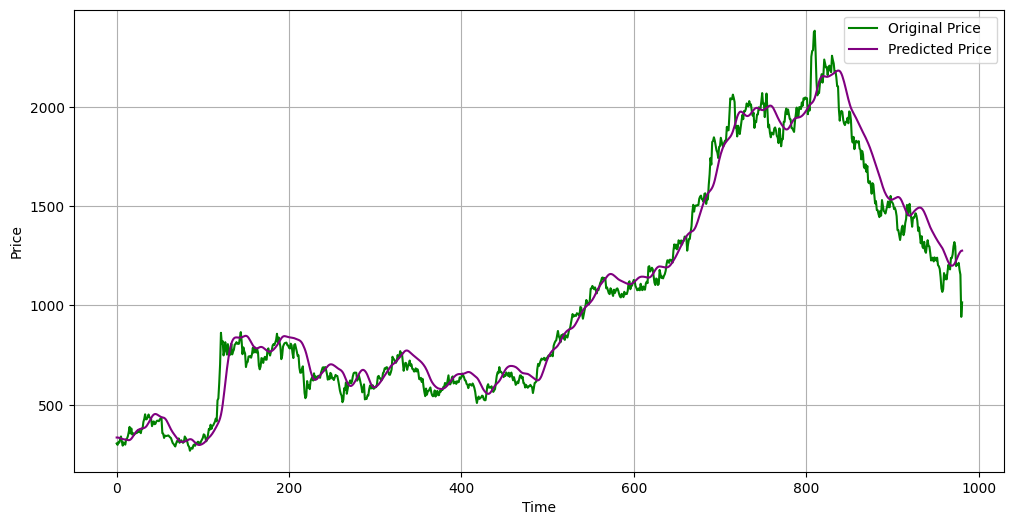

In [ ]:
import matplotlib.pyplot as plt

#  y_test and y_pred are  data arrays
plt.figure(figsize=(12, 6))

# Custom colors: Green for Original Price and Purple for Predicted Price
plt.plot(y_test, 'g', label="Original Price")  # Green
plt.plot(y_pred, '#800080', label="Predicted Price")  # Purple using hex code

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation

Calculation of mean absolute error and R2 Score

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))


Mean absolute error on test set: 5.88%


In [ ]:
from sklearn.metrics import r2_score
actual = y_test
predicted = y_pred
r2 = r2_score(actual, predicted)
print("R2 score:", r2)

R2 score: 0.9770406246763029


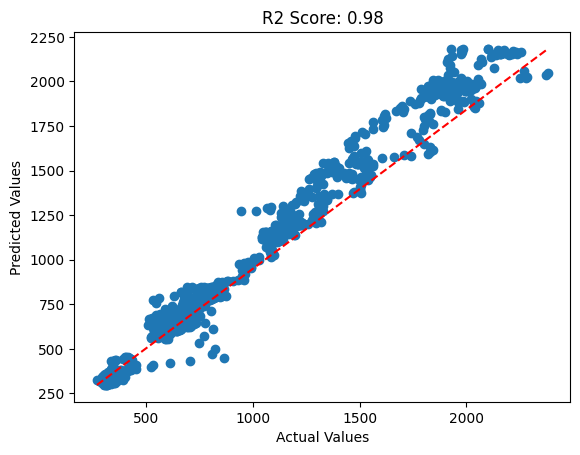

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()